Task Difficulty for VS

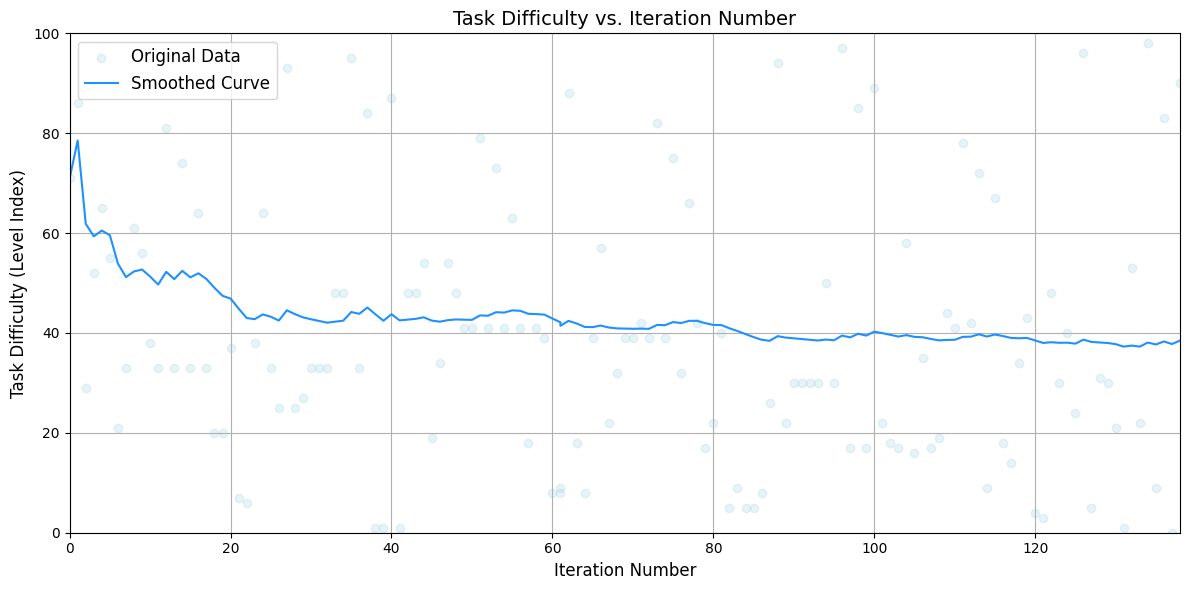

In [133]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def extract_iteration_and_level_indices(checkpoint_dir):
    """
    Extracts the iteration numbers and level indices from filenames in the checkpoint directory.
    Filenames are expected to be in the format 'ppo_checkpoint_iterX_levelY.zip',
    where X is the iteration number and Y is the level index.
    """
    model_files = [f for f in os.listdir(checkpoint_dir) if f.endswith('.zip')]
    iteration_level_pairs = []
    for model_file in model_files:
        iter_match = re.search(r'iter(\d+)', model_file)
        level_match = re.search(r'level(\d+)', model_file)
        if iter_match and level_match:
            iteration = int(iter_match.group(1))
            level = int(level_match.group(1))
            iteration_level_pairs.append((iteration, level))
    return sorted(iteration_level_pairs)  # Sort by iteration number

def filter_every_n_iterations(iteration_level_pairs, n=2):
    """
    Filters the iteration-level pairs to include only every nth iteration.
    """
    return [(iteration, level) for iteration, level in iteration_level_pairs if iteration % n == 0]

def plot_task_difficulty_vs_iteration(iteration_level_pairs, max_level=100, smoothing_factor=0.8):
    """
    Plots the task difficulty (based on level index) as a function of iteration number.
    Uses EWMA for smoothing.
    """
    df = pd.DataFrame(iteration_level_pairs, columns=['Iteration', 'Level'])
    df.set_index('Iteration', inplace=True)

    # Plot original data points
    plt.figure(figsize=(12, 6))
    plt.scatter(df.index, df['Level'], color='lightblue', alpha=0.3, label='Original Data')

    # Apply Exponential Weighted Moving Average (EWMA) for smoothing
    smoothed_levels = df['Level'].ewm(alpha=1 - smoothing_factor).mean()

    # Plot the smoothed curve
    plt.plot(smoothed_levels.index, smoothed_levels, color='dodgerblue', label='Smoothed Curve')

    plt.title('Task Difficulty vs. Iteration Number', fontsize=14)
    plt.xlabel('Iteration Number', fontsize=12)
    plt.ylabel('Task Difficulty (Level Index)', fontsize=12)
    plt.ylim(0, max_level)  # Set y-axis limits
    plt.xlim(df.index.min(), df.index.max())  # Set x-axis limits

    # Customize ticks
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Directory containing checkpoints
checkpoint_dir = '../train/logs/vws_ppo_checkpoints_PLRNorm/'

# Extract iteration numbers and level indices from checkpoint filenames
iteration_level_pairs = extract_iteration_and_level_indices(checkpoint_dir)

# Filter to include only every 2 iterations (you can change the n-value for different filtering)
filtered_iteration_level_pairs = filter_every_n_iterations(iteration_level_pairs, n=1)

# Plot task difficulty (level index) as a function of iteration number with smoothing
plot_task_difficulty_vs_iteration(filtered_iteration_level_pairs, max_level=100, smoothing_factor=0.99)

Task Difficulty for Stage-based RL

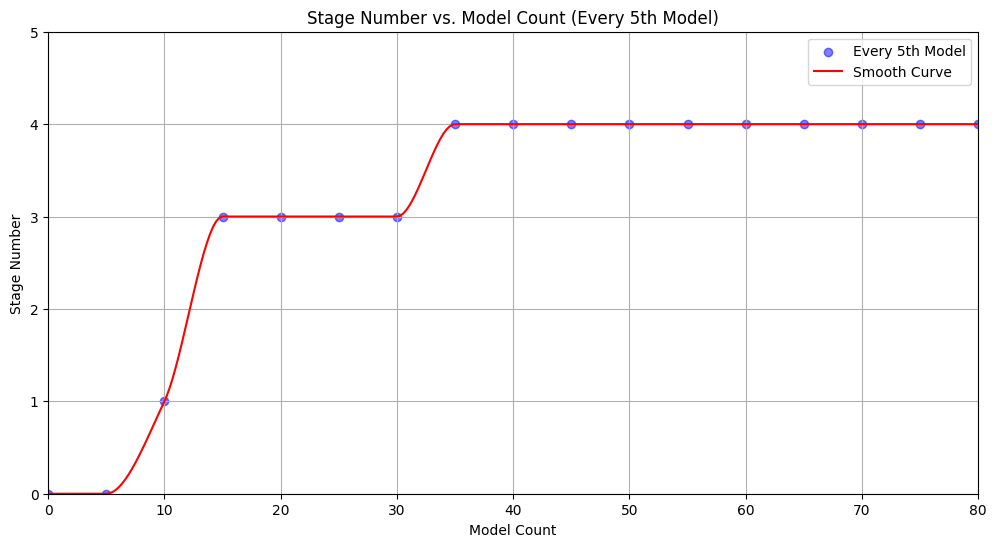

In [134]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import PchipInterpolator

def extract_stage_and_iteration(checkpoint_dir):
    """
    Extracts the stage numbers and iteration numbers from filenames in the checkpoint directory.
    Filenames are expected to be in the format 'ppo_checkpoint_stageX_iterY.zip',
    where X is the stage number and Y is the iteration number.
    """
    model_files = [f for f in os.listdir(checkpoint_dir) if f.endswith('.zip')]
    stage_iteration_pairs = []
    for model_file in model_files:
        stage_match = re.search(r'stage(\d+)', model_file)
        iter_match = re.search(r'iter(\d+)', model_file)
        if stage_match and iter_match:
            stage = int(stage_match.group(1))
            iteration = int(iter_match.group(1))
            stage_iteration_pairs.append((stage, iteration))
    return sorted(stage_iteration_pairs)  # Sort by stage number

def sample_every_n_models(stage_iteration_pairs, n=5):
    """
    Samples every nth model from the stage-iteration pairs.
    """
    return stage_iteration_pairs[::n]

def plot_stage_vs_model_count(stage_iteration_pairs):
    """
    Plots the stage number as a function of model count.
    Uses PCHIP interpolation to create a smooth curve.
    """
    model_counts = np.arange(len(stage_iteration_pairs)) * 5  # Multiply by 5 since we're sampling every 5th model
    stages = np.array([pair[0] for pair in stage_iteration_pairs])

    # Create PCHIP interpolation
    pchip = PchipInterpolator(model_counts, stages)

    # Create a smooth range of x values
    x_smooth = np.linspace(model_counts.min(), model_counts.max(), 300)
    y_smooth = pchip(x_smooth)

    # Clip the y values to respect the minimum stage (0) and maximum observed stage
    y_smooth = np.clip(y_smooth, 0, stages.max())

    plt.figure(figsize=(12, 6))
    
    # Plot original data points
    plt.scatter(model_counts, stages, color='blue', alpha=0.5, label='Every 5th Model')
    
    # Plot smooth curve
    plt.plot(x_smooth, y_smooth, color='red', label='Smooth Curve')

    plt.title('Stage Number vs. Model Count (Every 5th Model)')
    plt.xlabel('Model Count')
    plt.ylabel('Stage Number')
    plt.xlim(0, model_counts.max())
    plt.ylim(0, stages.max() + 1)  # Set y-axis limits, adding 1 to max for some headroom
    plt.legend()
    plt.grid(True)

    plt.show()

# Directory containing checkpoints
checkpoint_dir = '../train/logs/vws_ppo_checkpoints_HopperNorm/'

# Extract stage numbers and iteration numbers from checkpoint filenames
stage_iteration_pairs = extract_stage_and_iteration(checkpoint_dir)

# Sample every 5th model
sampled_stage_iteration_pairs = sample_every_n_models(stage_iteration_pairs, n=5)

# Plot stage number as a function of model count
plot_stage_vs_model_count(sampled_stage_iteration_pairs)

Task Difficulty for Vanila RL

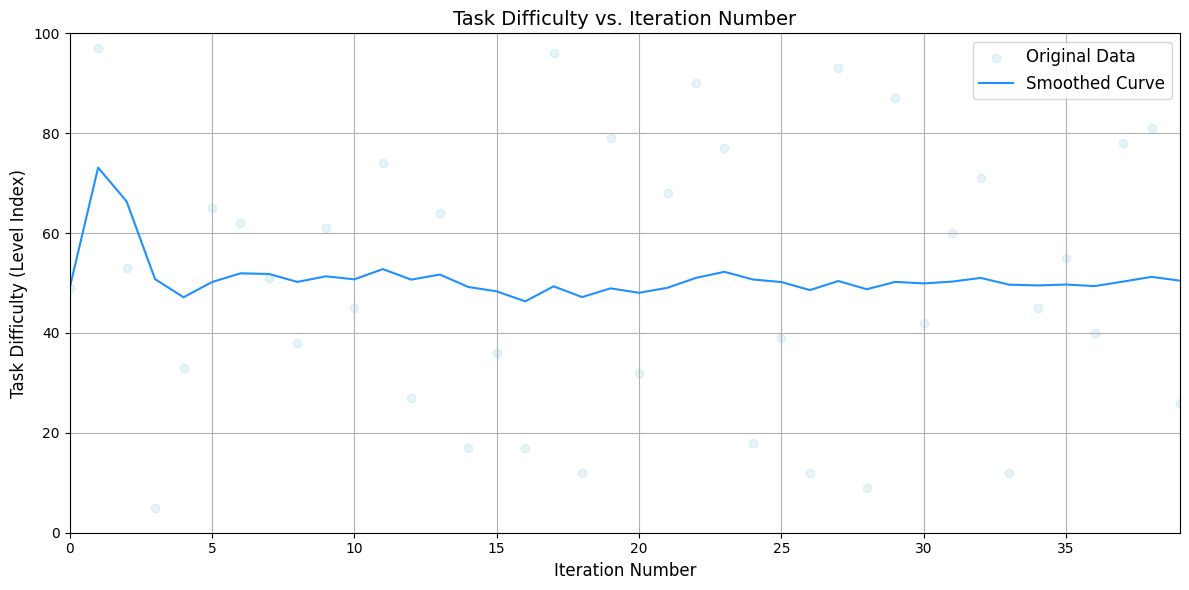

In [135]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def extract_iteration_and_level_indices(checkpoint_dir):
    """
    Extracts the iteration numbers and level indices from filenames in the checkpoint directory.
    Filenames are expected to be in the format 'ppo_checkpoint_iterX_levelY.zip',
    where X is the iteration number and Y is the level index.
    """
    model_files = [f for f in os.listdir(checkpoint_dir) if f.endswith('.zip')]
    iteration_level_pairs = []
    for model_file in model_files:
        iter_match = re.search(r'iter(\d+)', model_file)
        level_match = re.search(r'level(\d+)', model_file)
        if iter_match and level_match:
            iteration = int(iter_match.group(1))
            level = int(level_match.group(1))
            iteration_level_pairs.append((iteration, level))
    return sorted(iteration_level_pairs)  # Sort by iteration number

def filter_every_n_iterations(iteration_level_pairs, n=2):
    """
    Filters the iteration-level pairs to include only every nth iteration.
    """
    return [(iteration, level) for iteration, level in iteration_level_pairs if iteration % n == 0]

def plot_task_difficulty_vs_iteration(iteration_level_pairs, max_level=100, smoothing_factor=0.8):
    """
    Plots the task difficulty (based on level index) as a function of iteration number.
    Uses Exponential Weighted Moving Average (EWMA) for smoothing.
    """
    df = pd.DataFrame(iteration_level_pairs, columns=['Iteration', 'Level'])
    df.set_index('Iteration', inplace=True)

    # Plot original data points
    plt.figure(figsize=(12, 6))
    plt.scatter(df.index, df['Level'], color='lightblue', alpha=0.3, label='Original Data')

    # Apply Exponential Weighted Moving Average (EWMA) for smoothing
    smoothed_levels = df['Level'].ewm(alpha=1 - smoothing_factor).mean()

    # Plot the smoothed curve
    plt.plot(smoothed_levels.index, smoothed_levels, color='dodgerblue', label='Smoothed Curve')

    plt.title('Task Difficulty vs. Iteration Number', fontsize=14)
    plt.xlabel('Iteration Number', fontsize=12)
    plt.ylabel('Task Difficulty (Level Index)', fontsize=12)
    plt.ylim(0, max_level)  # Set y-axis limits
    plt.xlim(df.index.min(), df.index.max())  # Set x-axis limits

    # Customize ticks
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.legend(fontsize=12)
    plt.grid(True)  # Enable grid as in the second code
    plt.tight_layout()
    plt.show()

# Directory containing checkpoints
checkpoint_dir = '../train/logs/vws_ppo_checkpoints_BaseRL/'

# Extract iteration numbers and level indices from checkpoint filenames
iteration_level_pairs = extract_iteration_and_level_indices(checkpoint_dir)

# Filter to include only every 2 iterations (you can change the n-value for different filtering)
filtered_iteration_level_pairs = filter_every_n_iterations(iteration_level_pairs, n=1)

# Plot task difficulty (level index) as a function of iteration number with smoothing
plot_task_difficulty_vs_iteration(filtered_iteration_level_pairs, max_level=100, smoothing_factor=0.99)